In [1]:
from numpy.random.mtrand import rand
from agent import Agent
from maze import Maze
from policy import Policy

from util import plot_matrix, transform_policy_to_matrix_values

In [2]:
MAX_EPISODES = 100_000
THRESHOLD = 0.01
CONVERGED_THRESHOLD=1_000

In [3]:
maze = Maze(
    lenght=4,
    height=4,
    all_rewards=-1,
    special_rewards={
        (3, 0): 40,
        (2, 1): -10,
        (3, 1): -10,
        (0, 3): 10,
        (1, 3): -2},
    end_positions=[(3, 0), (0, 3)]
)

In [4]:
random_policy = Policy(lenght=4, height=4, greedy=False)
optimal_policy = Policy(lenght=4, height=4)

In [5]:
agent = Agent(maze, optimal_policy, (2, 3), 1)
agent.value_iteration()
agent.update_policy_to_deterministic()


Sweep 0: 
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Sweep 1: 
[[-1 -1 40  0]
 [-1 -1 -1 40]
 [10 -1 -1 -1]
 [ 0 10 -1 -1]]
Sweep 2: 
[[-2 39 40  0]
 [ 9 -2 39 40]
 [10  9 -2 30]
 [ 0 10  8 -2]]
Sweep 3: 
[[38 39 40  0]
 [ 9 38 39 40]
 [10  9 29 30]
 [ 0 10  8 29]]
Sweep 4: 
[[38 39 40  0]
 [37 38 39 40]
 [10 37 29 30]
 [ 0 10 28 29]]
Sweep 5: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 30]
 [ 0 36 28 29]]
Sweep 6: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 35]
 [ 0 36 35 29]]
Sweep 7: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 35]
 [ 0 36 35 34]]
Done after 7 sweeps!



In [6]:
agent.simulate()


Simulating agent starting on (2, 3)
Moving from (2, 3) to (2, 2) ↑
Moving from (2, 2) to (1, 2) ←
Moving from (1, 2) to (1, 1) ↑
Moving from (1, 1) to (1, 0) ↑
Moving from (1, 0) to (2, 0) →
Moving from (2, 0) to (3, 0) →
Finished simulation om (3, 0)



In [7]:
agent.visualize()


Values:         Policy:
 38 39 40  0    →  →  →  ⦾   
 37 38 39 40    ↑  ↑  ↑  ↑   
 36 37 36 35    →  ↑  ←  ←   
  0 36 35 34    ⦾  ↑  ↑  ↑   



## First-visit Monte Carlo prediction
Policy: random<br>
discount: 1

In [8]:
agent.policy = random_policy
agent.discount = 1
value_function = agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 54869 episodes.
[[-14.59727086 -11.04124061   1.25286439   0.        ]
 [-13.85468591 -16.14260529 -12.24858309  -3.48121729]
 [ -6.86435404 -13.6340719  -18.53087282 -18.62653932]
 [  0.          -8.23396592 -17.09805713 -20.25389567]]


## First-visit Monte Carlo prediction
Policy: random<br>
discount: 0.9

In [9]:
agent.discount = 0.9
value_function = agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 17361 episodes.
[[-5.38537238 -2.94425811  6.54893676  0.        ]
 [-5.26956604 -7.38676154 -5.04459985  2.59742761]
 [-0.75677915 -5.45403532 -9.19215036 -8.4036406 ]
 [ 0.         -1.40813082 -6.99801473 -8.31255361]]


## First-visit Monte Carlo prediction
Policy: optimal<br>
discount: 1

In [10]:
agent.policy = optimal_policy
agent.discount = 1
value_function = agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 40 episodes.
[[38. 39. 40.  0.]
 [37. 38. 39. 40.]
 [36. 37. 36. 35.]
 [ 0. 36. 35. 34.]]


## First-visit Monte Carlo prediction
Policy: optimal<br>
discount: 0.9

In [11]:
agent.discount = 0.9
value_function = agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 84 episodes.
[[30.5     35.      40.       0.     ]
 [26.45    30.5     35.      40.     ]
 [22.805   26.45    22.805   19.5245 ]
 [ 0.      22.805   19.5245  16.57205]]


## Tabular TD
Policy: random<br>
discount: 1

In [12]:
agent.policy = random_policy
agent.discount = 1
value_function = agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes
[[-13.43717661 -12.01457638  10.2915563    0.        ]
 [ -9.41375413 -12.06240551 -10.17767553   3.01230448]
 [  1.34009531  -9.78005791 -14.70809287 -16.9385587 ]
 [  0.          -8.46011274 -15.06622971 -17.85543568]]


## Tabular TD
Policy: random<br>
discount: 0.9

In [13]:
agent.policy = random_policy
agent.discount = 0.9
value_function = agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes
[[-5.18975503 -2.04040937 12.64179497  0.        ]
 [-4.74860373 -7.43586067 -5.2693733  -2.55397148]
 [ 1.87483226 -5.40761539 -7.84787335 -9.11677653]
 [ 0.         -0.71129521 -6.9757377  -8.1279768 ]]


## Tabular TD
Policy: optimal<br>
discount: 1

In [14]:
agent.policy = optimal_policy
agent.discount = 1
value_function = agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 1192 episodes.
[[38.         39.         40.          0.        ]
 [36.99999962 38.         38.99987955 39.99992373]
 [35.99996776 37.         36.         34.99999999]
 [ 0.         35.99999278 34.99999988 33.99981912]]


## Tabular TD
Policy: optimal<br>
discount: 0.9

In [15]:
agent.discount = 0.9
value_function = agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 1128 episodes.
[[30.5        35.         40.          0.        ]
 [26.44999996 30.5        34.9999956  39.99999641]
 [22.80480726 26.45       22.805      19.52449998]
 [ 0.         22.80464457 19.52449992 16.57200168]]


## On-policy first-visit Monte Carlo control
policy: random e-soft<br>
discount: 1

In [16]:
agent.policy = random_policy
agent.policy.reset_policy()
agent.discount = 1
qf = agent.on_policy_first_vist_mc(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


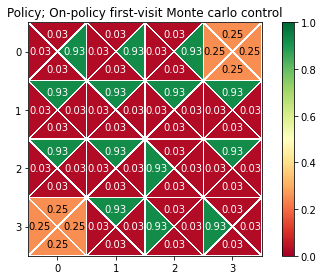

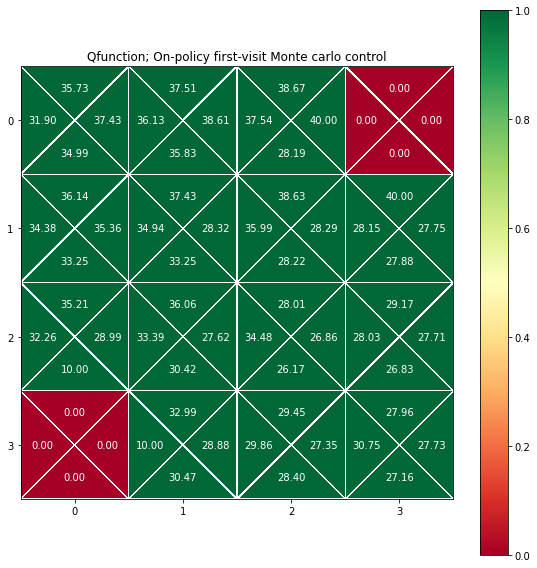

In [17]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; On-policy first-visit Monte carlo control')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; On-policy first-visit Monte carlo control')

## On-policy first-visit Monte Carlo control
policy: random e-soft<br>
discount: 0.9

In [18]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.on_policy_first_vist_mc(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


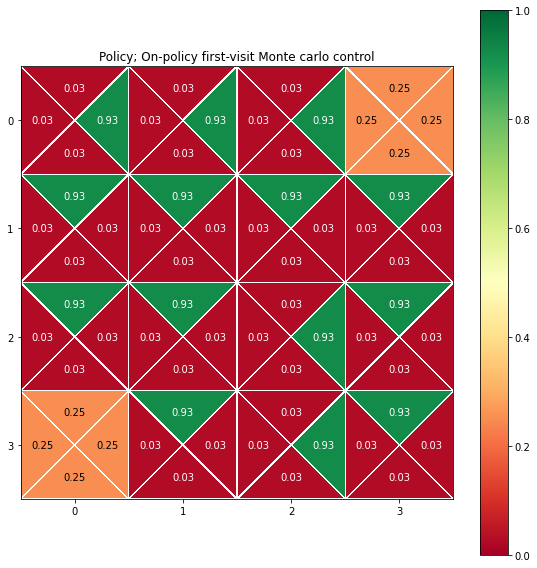

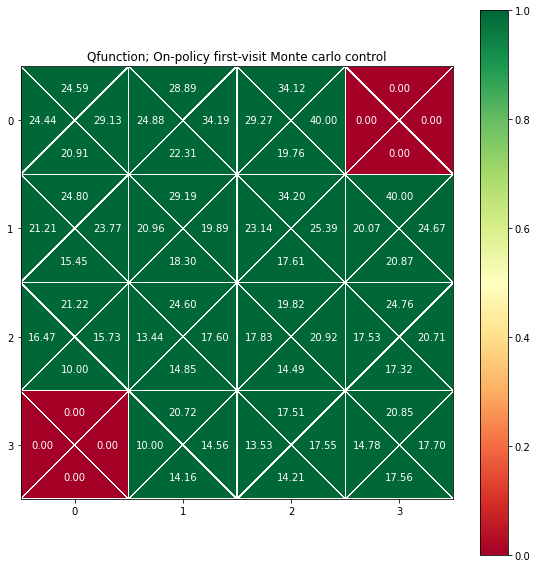

In [19]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; On-policy first-visit Monte carlo control')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; On-policy first-visit Monte carlo control')

## Sarsa (on-policy TD control)
policy: derived from Q<br>
discount: 1

In [20]:
agent.policy.reset_policy()
agent.discount = 1
qf = agent.sarsa(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


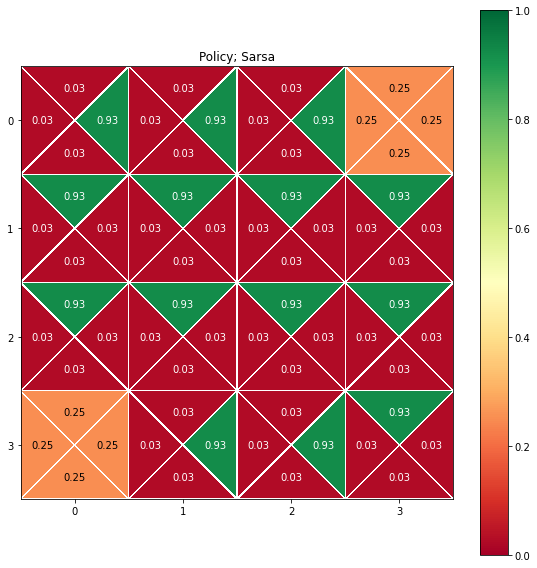

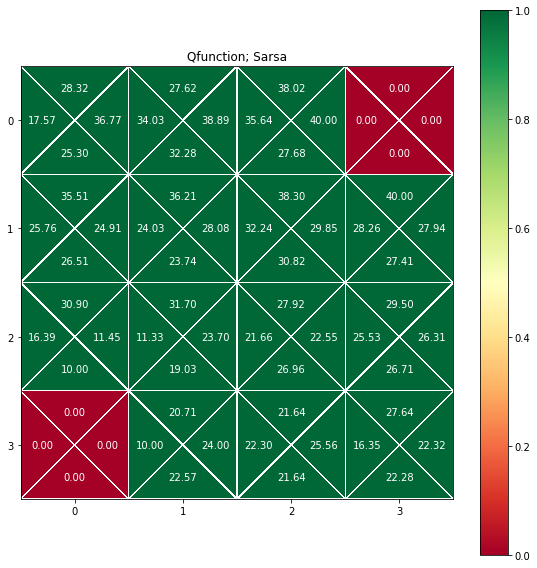

In [21]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Sarsa')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Sarsa')

## Sarsa (on-policy TD control)
policy: derived from Q<br>
discount: 0.9

In [22]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.sarsa(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


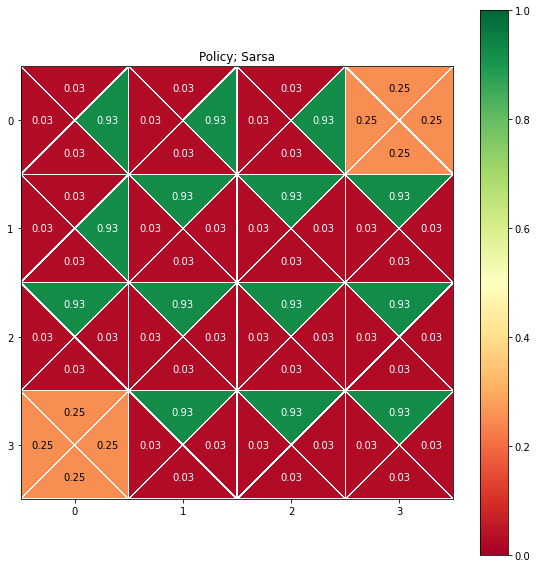

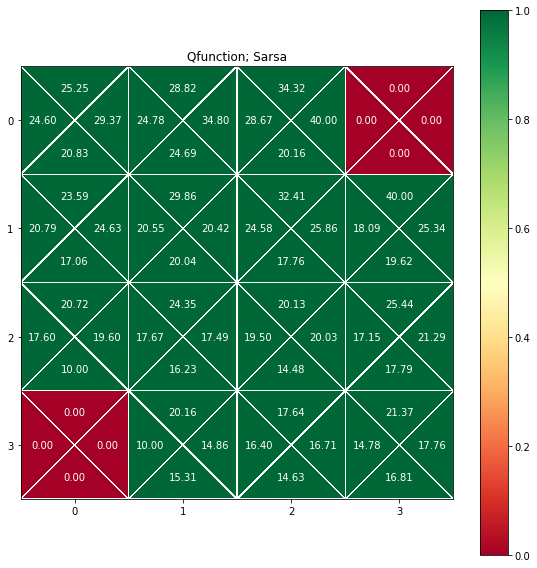

In [23]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Sarsa')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Sarsa')

## Q-learning (off-policy TD control)
policy: derived from Q<br>
discount: 1

In [24]:
agent.policy.reset_policy()
agent.discount = 1
qf = agent.q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 36996 episodes.


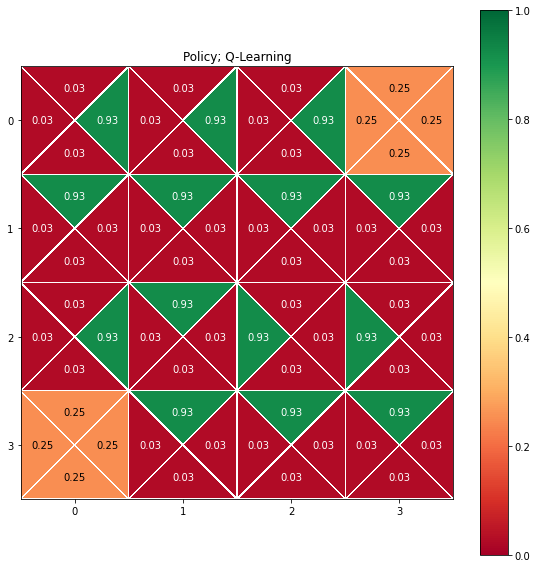

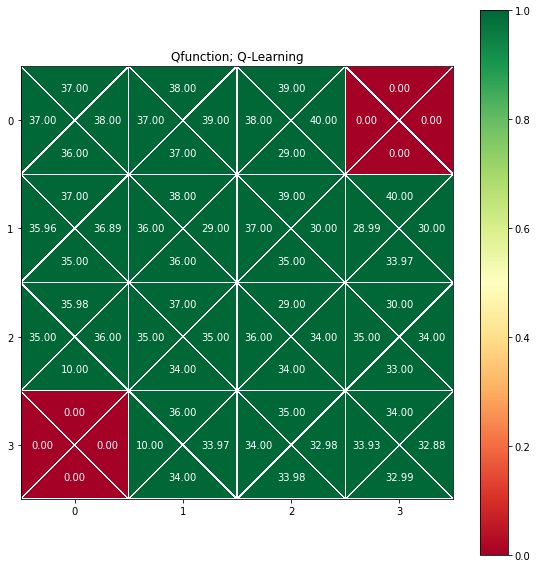

In [25]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Q-Learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Q-Learning')

## Q-learning (off-policy TD control)
policy: derived from Q<br>
discount: 0.9

In [26]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 36171 episodes.


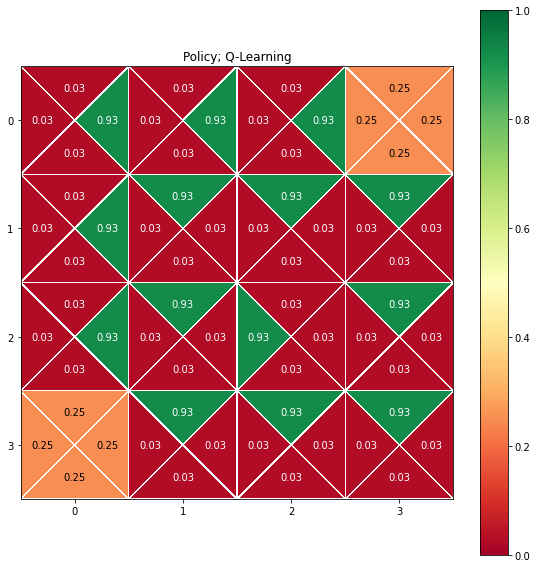

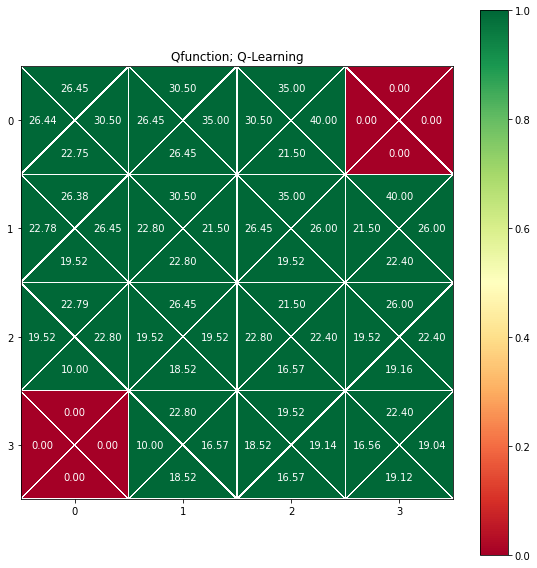

In [27]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Q-Learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Q-Learning')

## Double Q-learning
policy: derived from Q<br>
discount: 1

In [28]:
agent.policy.reset_policy()
agent.discount = 1
qf = agent.double_q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 76522 episodes.


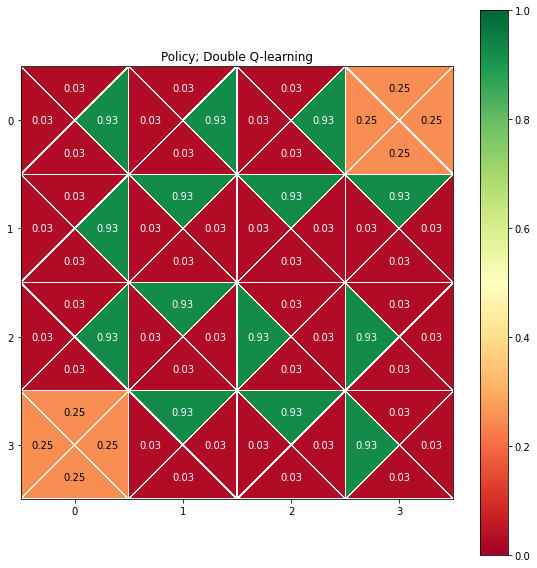

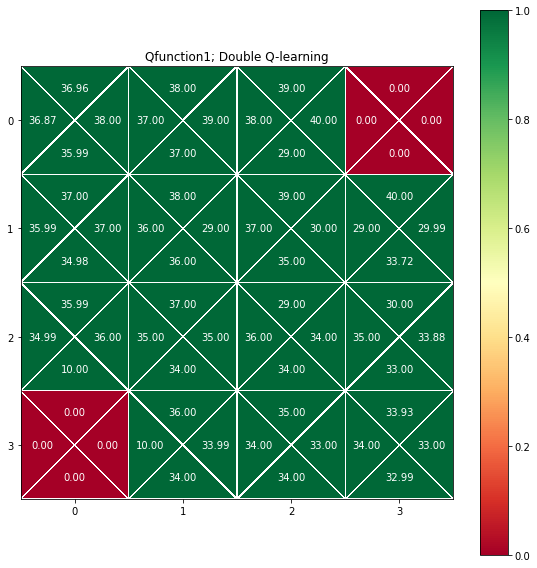

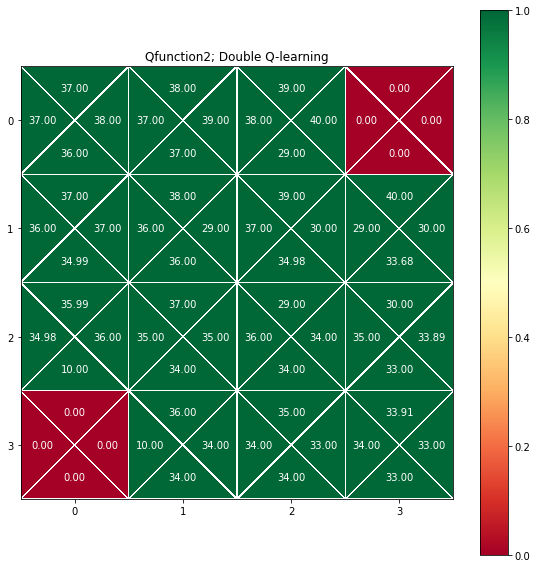

In [29]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[0]), 'Qfunction1; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[1]), 'Qfunction2; Double Q-learning')

## Double Q-learning
policy: derived from Q<br>
discount: 0.9

In [30]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.double_q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 57315 episodes.


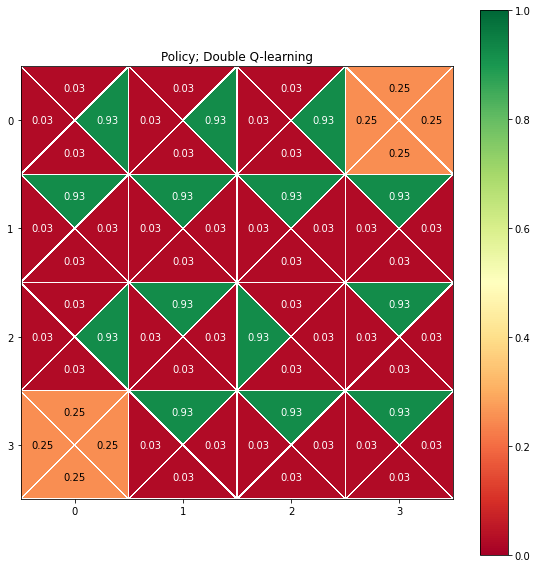

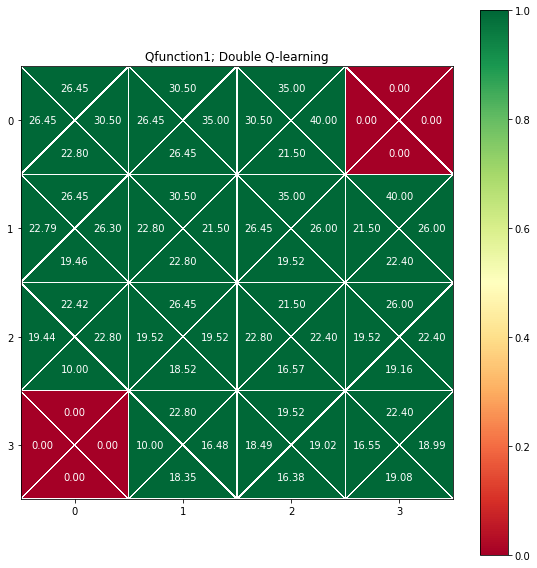

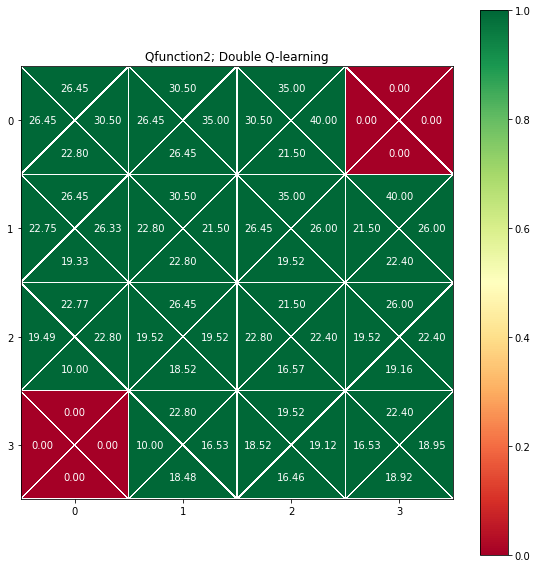

In [31]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[0]), 'Qfunction1; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[1]), 'Qfunction2; Double Q-learning')